In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from time import time

from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import make_pipeline, make_union
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import precision_score, recall_score

path_csvs = 'C:\\Users\\Veronika\\DATABASES\\p7_credit_default_risk_dataset\\'

from os import listdir
list_files = [file for file in listdir(path_csvs)]

rasta = 0

In [2]:
print(list_files)

['application_test.csv', 'application_train.csv', 'bureau.csv', 'bureau_balance.csv', 'credit_card_balance.csv', 'HomeCredit_columns_description.csv', 'installments_payments.csv', 'POS_CASH_balance.csv', 'previous_application.csv', 'sample_submission.csv']


In [3]:
application_train = pd.read_csv(path_csvs + 'application_train.csv')
application_train.info()
# application_train.iloc[:, :10].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


application_train table:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307,511 entries, 0 to 307,510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 10 columns):
     Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   SK_ID_CURR          307511 non-null  int64  
 1   TARGET              307511 non-null  int64  
 2   NAME_CONTRACT_TYPE  307511 non-null  object 
 3   CODE_GENDER         307511 non-null  object 
 4   FLAG_OWN_CAR        307511 non-null  object 
 5   FLAG_OWN_REALTY     307511 non-null  object 
 6   CNT_CHILDREN        307511 non-null  int64  
 7   AMT_INCOME_TOTAL    307511 non-null  float64
 8   AMT_CREDIT          307511 non-null  float64
 9   AMT_ANNUITY         307499 non-null  float64
dtypes: float64(3), int64(3), object(4)
memory usage: 23.5+ MB

In [4]:
# application_test = pd.read_csv(path_csvs + 'application_test.csv')
# application_test.info()

# # # # print()

# application_test.iloc[:, :10].info()
# application_test.select_dtypes(include='object').info()

application_test table:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 10 columns):
     Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SK_ID_CURR          48744 non-null  int64  
 1   NAME_CONTRACT_TYPE  48744 non-null  object 
 2   CODE_GENDER         48744 non-null  object 
 3   FLAG_OWN_CAR        48744 non-null  object 
 4   FLAG_OWN_REALTY     48744 non-null  object 
 5   CNT_CHILDREN        48744 non-null  int64  
 6   AMT_INCOME_TOTAL    48744 non-null  float64
 7   AMT_CREDIT          48744 non-null  float64
 8   AMT_ANNUITY         48720 non-null  float64
 9   AMT_GOODS_PRICE     48744 non-null  float64
dtypes: float64(4), int64(2), object(4)
memory usage: 3.7+ MB

application_test(dtype = object) table:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 16 columns):
     Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   NAME_CONTRACT_TYPE          48744 non-null  object
 1   CODE_GENDER                 48744 non-null  object
 2   FLAG_OWN_CAR                48744 non-null  object
 3   FLAG_OWN_REALTY             48744 non-null  object
 4   NAME_TYPE_SUITE             47833 non-null  object
 5   NAME_INCOME_TYPE            48744 non-null  object
 6   NAME_EDUCATION_TYPE         48744 non-null  object
 7   NAME_FAMILY_STATUS          48744 non-null  object
 8   NAME_HOUSING_TYPE           48744 non-null  object
 9   OCCUPATION_TYPE             33139 non-null  object
 10  WEEKDAY_APPR_PROCESS_START  48744 non-null  object
 11  ORGANIZATION_TYPE           48744 non-null  object
 12  FONDKAPREMONT_MODE          15947 non-null  object
 13  HOUSETYPE_MODE              25125 non-null  object
 14  WALLSMATERIAL_MODE          24851 non-null  object
 15  EMERGENCYSTATE_MODE         26535 non-null  object
dtypes: object(16)
memory usage: 6.0+ MB

In [5]:
# bureau = pd.read_csv(path_csvs + 'bureau.csv')
# bureau.info()

bureau table:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1,716,428 entries, 0 to 1,716,427
Data columns (total 17 columns):
    Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB

In [6]:
# bureau_balance = pd.read_csv(path_csvs + 'bureau_balance.csv')
# bureau_balance.info()

bureau_balance table: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27,299,925 entries, 0 to 27,299,924
Data columns (total 3 columns):
     Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB

In [7]:
# credit_card_balance = pd.read_csv(path_csvs + 'credit_card_balance.csv')
# credit_card_balance.info()

credit_card_balance table: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3,840,312 entries, 0 to 3,840,311
Data columns (total 23 columns):
     Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_CURRENT    float64
 19  CNT_INSTALMENT_MATURE_CUM   float64
 20  NAME_CONTRACT_STATUS        object 
 21  SK_DPD                      int64  
 22  SK_DPD_DEF                  int64  
dtypes: float64(15), int64(7), object(1)
memory usage: 673.9+ MB

In [8]:
# installments_payments = pd.read_csv(path_csvs + 'installments_payments.csv')
# installments_payments.info()

installments_payments table:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13,605,401 entries, 0 to 13,605,400
Data columns (total 8 columns):
     Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB

In [9]:
# POS_CASH_balance = pd.read_csv(path_csvs + 'POS_CASH_balance.csv')
# POS_CASH_balance.info()

POS_CASH_balance table:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10,001,358 entries, 0 to 10,001,357
Data columns (total 8 columns):
     Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB

In [10]:
# previous_application = pd.read_csv(path_csvs + 'previous_application.csv')
# previous_application.info()

previous_application table: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1,670,214 entries, 0 to 1,670,213
Data columns (total 37 columns):
     Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-null   float64
 13  RATE_INTEREST_PRIMARY        5951 non-null     float64
 14  RATE_INTEREST_PRIVILEGED     5951 non-null     float64
 15  NAME_CASH_LOAN_PURPOSE       1670214 non-null  object 
 16  NAME_CONTRACT_STATUS         1670214 non-null  object 
 17  DAYS_DECISION                1670214 non-null  int64  
 18  NAME_PAYMENT_TYPE            1670214 non-null  object 
 19  CODE_REJECT_REASON           1670214 non-null  object 
 20  NAME_TYPE_SUITE              849809 non-null   object 
 21  NAME_CLIENT_TYPE             1670214 non-null  object 
 22  NAME_GOODS_CATEGORY          1670214 non-null  object 
 23  NAME_PORTFOLIO               1670214 non-null  object 
 24  NAME_PRODUCT_TYPE            1670214 non-null  object 
 25  CHANNEL_TYPE                 1670214 non-null  object 
 26  SELLERPLACE_AREA             1670214 non-null  int64  
 27  NAME_SELLER_INDUSTRY         1670214 non-null  object 
 28  CNT_PAYMENT                  1297984 non-null  float64
 29  NAME_YIELD_GROUP             1670214 non-null  object 
 30  PRODUCT_COMBINATION          1669868 non-null  object 
 31  DAYS_FIRST_DRAWING           997149 non-null   float64
 32  DAYS_FIRST_DUE               997149 non-null   float64
 33  DAYS_LAST_DUE_1ST_VERSION    997149 non-null   float64
 34  DAYS_LAST_DUE                997149 non-null   float64
 35  DAYS_TERMINATION             997149 non-null   float64
 36  NFLAG_INSURED_ON_APPROVAL    997149 non-null   float64
dtypes: float64(15), int64(6), object(16)
memory usage: 471.5+ MB

In [11]:
# previous_application.select_dtypes(include='object').info()

previous_application (dtype = object) table:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1,670,214 entries, 0 to 1,670,213
Data columns (total 16 columns):
     Column                       Non-Null Count    Dtype 
---  ------                       --------------    ----- 
 0   NAME_CONTRACT_TYPE           1670214 non-null  object
 1   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object
 2   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object
 3   NAME_CASH_LOAN_PURPOSE       1670214 non-null  object
 4   NAME_CONTRACT_STATUS         1670214 non-null  object
 5   NAME_PAYMENT_TYPE            1670214 non-null  object
 6   CODE_REJECT_REASON           1670214 non-null  object
 7   NAME_TYPE_SUITE              849809 non-null   object
 8   NAME_CLIENT_TYPE             1670214 non-null  object
 9   NAME_GOODS_CATEGORY          1670214 non-null  object
 10  NAME_PORTFOLIO               1670214 non-null  object
 11  NAME_PRODUCT_TYPE            1670214 non-null  object
 12  CHANNEL_TYPE                 1670214 non-null  object
 13  NAME_SELLER_INDUSTRY         1670214 non-null  object
 14  NAME_YIELD_GROUP             1670214 non-null  object
 15  PRODUCT_COMBINATION          1669868 non-null  object
dtypes: object(16)
memory usage: 203.9+ MB

In [12]:
# sample_submission = pd.read_csv(path_csvs + 'sample_submission.csv')
# sample_submission.info()

sample_submission table:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48,744 entries, 0 to 48,743
Data columns (total 2 columns):
     Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SK_ID_CURR  48744 non-null  int64  
 1   TARGET      48744 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 761.8 KB

In [13]:
# HomeCredit_columns_description = pd.read_csv(path_csvs + 'HomeCredit_columns_description.csv')
# UnicodeDecodeError: 'utf-8' codec can't decode byte 0x85 in position 1283: invalid start byte

HomeCredit_columns_description = pd.read_csv(path_csvs + 'HomeCredit_columns_description.csv', encoding= 'unicode_escape')
HomeCredit_columns_description.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Number       219 non-null    int64 
 1   Table        219 non-null    object
 2   Row          219 non-null    object
 3   Description  219 non-null    object
 4   Special      86 non-null     object
dtypes: int64(1), object(4)
memory usage: 8.7+ KB


Clients income type (businessman, working, maternity leave,)

The unreadable symbol is an ellipsis. When I replaced it with "etc.", it raised an error in a later position: 26,931 instead of 1283.

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x85 in position 26931: invalid start byte


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 5 columns):
     Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Number       219 non-null    int64 
 1   Table        219 non-null    object
 2   Row          219 non-null    object
 3   Description  219 non-null    object
 4   Special      86 non-null     object
dtypes: int64(1), object(4)
memory usage: 8.7+ KB

In [14]:
# print(pd.get_option('display.max_colwidth'))
pd.set_option('max_colwidth', None)
# print(pd.get_option('display.max_colwidth'))
display(HomeCredit_columns_description.head(3))
# print(pd.get_option('display.max_colwidth'))
# pd.reset_option('max_colwidth')

,Number,Table,Row,Description,Special
0,1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_{train|test}.csv,TARGET,"Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)",NaN
2,5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN


In [15]:
HomeCredit_columns_description.Description[1]
# HomeCredit_columns_description.Description.map(print)

'Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)'

In [16]:
HomeCredit_columns_description.Table.unique()

array(['application_{train|test}.csv', 'bureau.csv', 'bureau_balance.csv',
       'POS_CASH_balance.csv', 'credit_card_balance.csv',
       'previous_application.csv', 'installments_payments.csv'],
      dtype=object)

In [17]:
pd.set_option('max_rows', None)
HomeCredit_columns_description.loc[HomeCredit_columns_description.Table == 'application_{train|test}.csv', ['Description']]
# pd.reset_option('max_rows')

,Description
0,ID of loan in our sample
1,"Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)"
2,Identification if loan is cash or revolving
3,Gender of the client
4,Flag if the client owns a car
5,Flag if client owns a house or flat
6,Number of children the client has
7,Income of the client
8,Credit amount of the loan
9,Loan annuity


In [18]:
HomeCredit_columns_description.loc[HomeCredit_columns_description.Table == 'bureau.csv', ['Description']]
# pd.reset_option('max_rows')

,Description
122,"ID of loan in our sample - one loan in our sample can have 0,1,2 or more related previous credits in credit bureau"
123,Recoded ID of previous Credit Bureau credit related to our loan (unique coding for each loan application)
124,Status of the Credit Bureau (CB) reported credits
125,Recoded currency of the Credit Bureau credit
126,How many days before current application did client apply for Credit Bureau credit
127,Number of days past due on CB credit at the time of application for related loan in our sample
128,Remaining duration of CB credit (in days) at the time of application in Home Credit
129,Days since CB credit ended at the time of application in Home Credit (only for closed credit)
130,Maximal amount overdue on the Credit Bureau credit so far (at application date of loan in our sample)
131,How many times was the Credit Bureau credit prolonged


In [19]:
HomeCredit_columns_description.loc[HomeCredit_columns_description.Table == 'POS_CASH_balance.csv', ['Description']]
# pd.reset_option('max_rows')

,Description
142,"ID of previous credit in Home Credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loans in Home Credit)"
143,ID of loan in our sample
144,"Month of balance relative to application date (-1 means the information to the freshest monthly snapshot, 0 means the information at application - often it will be the same as -1 as many banks are not updating the information to Credit Bureau regularly )"
145,Term of previous credit (can change over time)
146,Installments left to pay on the previous credit
147,Contract status during the month
148,DPD (days past due) during the month of previous credit
149,DPD during the month with tolerance (debts with low loan amounts are ignored) of the previous credit


In [20]:
HomeCredit_columns_description.loc[HomeCredit_columns_description.Table == 'credit_card_balance.csv', ['Description']]
# pd.reset_option('max_rows')

,Description
150,"ID of previous credit in Home credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loans in Home Credit)"
151,ID of loan in our sample
152,Month of balance relative to application date (-1 means the freshest balance date)
153,Balance during the month of previous credit
154,Credit card limit during the month of the previous credit
155,Amount drawing at ATM during the month of the previous credit
156,Amount drawing during the month of the previous credit
157,Amount of other drawings during the month of the previous credit
158,Amount drawing or buying goods during the month of the previous credit
159,Minimal installment for this month of the previous credit


In [21]:
HomeCredit_columns_description.loc[HomeCredit_columns_description.Table == 'previous_application.csv', ['Description']]
# pd.reset_option('max_rows')

,Description
173,"ID of previous credit in Home credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loan applications in Home Credit, previous application could, but not necessarily have to lead to credit)"
174,ID of loan in our sample
175,"Contract product type (Cash loan, consumer loan [POS] ,...) of the previous application"
176,Annuity of previous application
177,For how much credit did client ask on the previous application
178,"Final credit amount on the previous application. This differs from AMT_APPLICATION in a way that the AMT_APPLICATION is the amount for which the client initially applied for, but during our approval process he could have received different amount - AMT_CREDIT"
179,Down payment on the previous application
180,Goods price of good that client asked for (if applicable) on the previous application
181,On which day of the week did the client apply for previous application
182,Approximately at what day hour did the client apply for the previous application


In [22]:
HomeCredit_columns_description.loc[HomeCredit_columns_description.Table == 'installments_payments.csv', ['Description']]
# pd.reset_option('max_rows')

,Description
211,"ID of previous credit in Home credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loans in Home Credit)"
212,ID of loan in our sample
213,Version of installment calendar (0 is for credit card) of previous credit. Change of installment version from month to month signifies that some parameter of payment calendar has changed
214,On which installment we observe payment
215,When the installment of previous credit was supposed to be paid (relative to application date of current loan)
216,When was the installments of previous credit paid actually (relative to application date of current loan)
217,What was the prescribed installment amount of previous credit on this installment
218,What the client actually paid on previous credit on this installment


In [23]:
# HomeCredit_columns_description.loc[HomeCredit_columns_description.Special.notna(), ['Description', 'Special']].apply(print)
# HomeCredit_columns_description.loc[HomeCredit_columns_description.Special.notna(), ['Description', 'Special']].applymap(print)
HomeCredit_columns_description.loc[HomeCredit_columns_description.Special.notna(), ['Description', 'Special']]

,Description,Special
16,Normalized population of region where client lives (higher number means the client lives in more populated region),normalized
17,Client's age in days at the time of application,time only relative to the application
18,How many days before the application the person started current employment,time only relative to the application
19,How many days before the application did client change his registration,time only relative to the application
20,How many days before the application did client change the identity document with which he applied for the loan,time only relative to the application
33,Approximately at what hour did the client apply for the loan,rounded
41,Normalized score from external data source,normalized
42,Normalized score from external data source,normalized
43,Normalized score from external data source,normalized
44,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor",normalized


## Exploration de données

In [24]:
pd.reset_option("max_rows")
pd.get_option("max_rows")

60

In [25]:
filled_values = application_train.count().sort_values(ascending=False)
filled_values

SK_ID_CURR                     307511
FLAG_DOCUMENT_15               307511
HOUR_APPR_PROCESS_START        307511
REG_REGION_NOT_LIVE_REGION     307511
LIVE_REGION_NOT_WORK_REGION    307511
                                ...  
NONLIVINGAPARTMENTS_MODE        93997
NONLIVINGAPARTMENTS_MEDI        93997
COMMONAREA_AVG                  92646
COMMONAREA_MEDI                 92646
COMMONAREA_MODE                 92646
Length: 122, dtype: int64

In [26]:
diversity = application_train.nunique().sort_values()
diversity

LIVE_CITY_NOT_WORK_CITY         2
FLAG_DOCUMENT_18                2
FLAG_DOCUMENT_14                2
FLAG_MOBIL                      2
FLAG_EMP_PHONE                  2
                            ...  
DAYS_REGISTRATION           15688
DAYS_BIRTH                  17460
EXT_SOURCE_1               114584
EXT_SOURCE_2               119831
SK_ID_CURR                 307511
Length: 122, dtype: int64

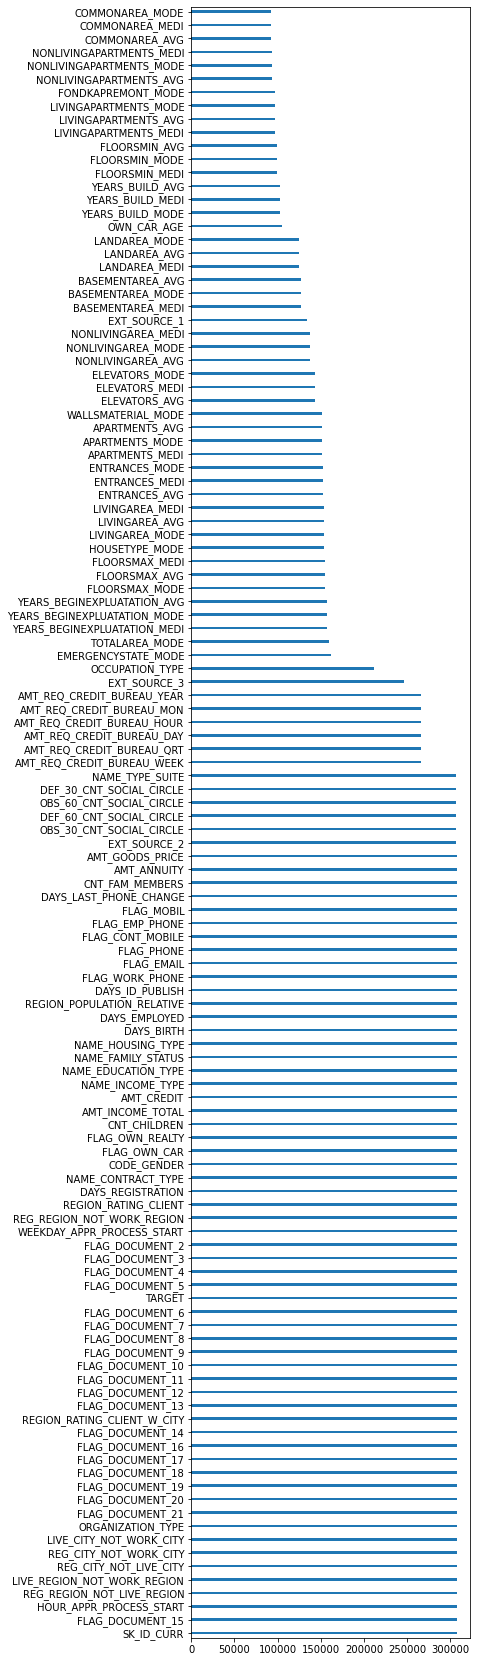

In [27]:
filled_values.plot(kind='barh', figsize=(5, 30), width=0.2)
plt.show()

Group by gender, own car, own realty - see whether is affect the target value.

In [28]:
test = application_train.TARGET.value_counts()
print(test)
print(f'{round(test[1] / application_train.shape[0] * 100, 3)}% users fail to pay their loans')

0    282686
1     24825
Name: TARGET, dtype: int64
8.073% users fail to pay their loans


Juste 8% d'utilisateurs ne rembourse pas leurs crédits, pourtant il est essentiel de détecter ceux-ci.

In [29]:
application_train.NAME_CONTRACT_TYPE.value_counts()

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

10% d'utilisateurs prennent des crédits recurrents, la majorité prend des crédits au term.

In [30]:
application_train.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [31]:
application_train.FLAG_OWN_CAR.value_counts()

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64

In [32]:
application_train.FLAG_OWN_REALTY.value_counts()

Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64

In [33]:
mini = application_train.iloc[:, 1:6]
mini

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY
0,1,Cash loans,M,N,Y
1,0,Cash loans,F,N,N
2,0,Revolving loans,M,Y,Y
3,0,Cash loans,F,N,Y
4,0,Cash loans,M,N,Y
...,...,...,...,...,...
307506,0,Cash loans,M,N,N
307507,0,Cash loans,F,N,Y
307508,0,Cash loans,F,N,Y
307509,1,Cash loans,F,N,Y


In [34]:
test = mini.groupby(['TARGET', 'CODE_GENDER']).agg('count').iloc[:, 0].unstack().fillna(0)
# sns.heatmap(test, annot=True, cmap='Blues', fmt='g')
test_t = test.transpose()

test1 = pd.DataFrame()
for col in test:
    test1[col] = test[col] / test[col].sum() * 100
display(test1)

test2 = pd.DataFrame()
for col in test_t:
    test2[col] = test_t[col] / test_t[col].sum() * 100
display(test2)

,F,M,XNA
TARGET,,,
0,93.000672,89.85808,100.0
1,6.999328,10.14192,0.0


,0,1
CODE_GENDER,,
F,66.603228,57.079557
M,33.395357,42.920443
XNA,0.001415,0.000000


Women fail to pay a credit in 7% cases, men in 10.14%. Who pays credit: 66% women 33% men. Who don't pay: 43% women 57% men.

Heatmap isn't a good method to represent the difference.

In [35]:
test = mini.groupby(['TARGET', 'NAME_CONTRACT_TYPE']).agg('count').iloc[:, 0].unstack()
test_t = test.transpose()

test1 = pd.DataFrame()
for col in test:
    test1[col] = test[col] / test[col].sum() * 100
display(test1)

test2 = pd.DataFrame()
for col in test_t:
    test2[col] = test_t[col] / test_t[col].sum() * 100
display(test2)

,Cash loans,Revolving loans
TARGET,,
0,91.654087,94.521671
1,8.345913,5.478329


,0,1
NAME_CONTRACT_TYPE,,
Cash loans,90.209986,93.538771
Revolving loans,9.790014,6.461229


In [36]:
test = mini.groupby(['TARGET', 'FLAG_OWN_CAR']).agg('count').iloc[:, 0].unstack()
test_t = test.transpose()

test1 = pd.DataFrame()
for col in test:
    test1[col] = test[col] / test[col].sum() * 100
display(test1)

test2 = pd.DataFrame()
for col in test_t:
    test2[col] = test_t[col] / test_t[col].sum() * 100
display(test2)

,N,Y
TARGET,,
0,91.499773,92.75627
1,8.500227,7.24373


,0,1
FLAG_OWN_CAR,,
N,65.682418,69.482377
Y,34.317582,30.517623


In [37]:
test = mini.groupby(['TARGET', 'FLAG_OWN_REALTY']).agg('count').iloc[:, 0].unstack()
test_t = test.transpose()

test1 = pd.DataFrame()
for col in test:
    test1[col] = test[col] / test[col].sum() * 100
display(test1)

test2 = pd.DataFrame()
for col in test_t:
    test2[col] = test_t[col] / test_t[col].sum() * 100
display(test2)

,N,Y
TARGET,,
0,91.675071,92.038423
1,8.324929,7.961577


,0,1
FLAG_OWN_REALTY,,
N,30.548736,31.589124
Y,69.451264,68.410876


In [38]:
test = application_train.groupby(['TARGET', 'NAME_FAMILY_STATUS']).agg('count').iloc[:, 0].unstack().fillna(0)
test_t = test.transpose()

test1 = pd.DataFrame()
for col in test:
    test1[col] = test[col] / test[col].sum() * 100
display(test1)

test2 = pd.DataFrame()
for col in test_t:
    test2[col] = test_t[col] / test_t[col].sum() * 100
display(test2)

,Civil marriage,Married,Separated,Single / not married,Unknown,Widow
TARGET,,,,,,
0,90.055416,92.440132,91.805766,90.192325,100.0,94.175783
1,9.944584,7.559868,8.194234,9.807675,0.0,5.824217


,0,1
NAME_FAMILY_STATUS,,
Civil marriage,9.485436,11.927492
Married,64.234522,59.818731
Separated,6.420551,6.525680
Single / not married,14.499126,17.953676
Unknown,0.000707,0.000000
Widow,5.359657,3.774421


Seems like the people bring the application on Saturday (7.887) or Sunday(7.929) have slightly less likely to fail the credit? And on Monday(7.757) - even less? While the highest is Tuesday (8.350). The difference is 7.5 %, I can drop this category for now.

In [39]:
test = application_train.groupby(['TARGET', 'ORGANIZATION_TYPE']).agg('count').iloc[:, 0].unstack()
test_t = test.transpose()

test1 = pd.DataFrame()
for col in test:
    test1[col] = test[col] / test[col].sum() * 100
display(test1.transpose())

test2 = pd.DataFrame()
for col in test_t:
    test2[col] = test_t[col] / test_t[col].sum() * 100
display(test2)

TARGET,0,1
Advertising,91.841492,8.158508
Agriculture,89.527302,10.472698
Bank,94.814519,5.185481
Business Entity Type 1,91.861631,8.138369
Business Entity Type 2,91.471619,8.528381
Business Entity Type 3,90.700377,9.299623
Cleaning,88.846154,11.153846
Construction,88.320190,11.679810
Culture,94.459103,5.540897
Electricity,93.368421,6.631579


,0,1
ORGANIZATION_TYPE,,
Advertising,0.139377,0.140987
Agriculture,0.777187,1.035247
Bank,0.840862,0.523666
Business Entity Type 1,1.944560,1.961732
Business Entity Type 2,3.414743,3.625378
Business Entity Type 3,21.815371,25.470292
Cleaning,0.081716,0.116818
Construction,2.099856,3.162135
Culture,0.126642,0.084592


# Data cleaning

The simplest cleaning consist of remove all the columns that have NaN values, then keeping only the columns that have 2 or 3 unique values. If we have more than 10 dimensions, we can test it as a dummy model.

In [40]:
data_cleaned = application_train.dropna(axis=1).copy()
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 55 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   NAME_INCOME_TYPE             307511 non-null  object 
 10  NAME_EDUCATION_TYPE          307511 non-null  object 
 11  NAME_FAMILY_STATUS           307511 non-null  object 
 12  NAME_HOUSING_TYPE            307511 non-null  object 
 13 

In [41]:
data_cleaned.select_dtypes(include='object').nunique()

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
dtype: int64

In [42]:
data_cleaned.NAME_FAMILY_STATUS.value_counts()

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

I want to remove 1 extra dimension of a gender and of marital status. First I checked their target value - it's negative. Then I will replace them to the major class.

Note that when you have the "unknown" information at the testing phase on the data without target, please fill the NaN values with the most risky class, not wit the major class.

In [43]:
data_cleaned.loc[data_cleaned.CODE_GENDER == 'XNA', 'CODE_GENDER'] = 'F'

In [44]:
data_cleaned.loc[data_cleaned.NAME_FAMILY_STATUS == 'Unknown', 'NAME_FAMILY_STATUS'] = 'Married'

In [45]:
data_cleaned.select_dtypes(include='object').nunique()

NAME_CONTRACT_TYPE             2
CODE_GENDER                    2
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             5
NAME_HOUSING_TYPE              6
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
dtype: int64

In [46]:
data_cleaned.drop('WEEKDAY_APPR_PROCESS_START', axis=1, inplace=True)

# Train test split

Stratified train test split which preserves the proportion of negative and positive as in whe whole dataset (8% positives in both train split and test split)

In [47]:
data_train, data_test = train_test_split(data_cleaned, test_size=0.2, random_state = rasta, stratify=data_cleaned.TARGET)

In [48]:
X_train = data_train.drop('TARGET', axis=1)
X_test = data_test.drop('TARGET', axis=1)
y_train = data_train.TARGET
y_test = data_test.TARGET
X_full = data_cleaned.drop('TARGET', axis=1)

# Dummy classifier

We work with a database which has a major and a minor class, where the detection of the minor class is super-important. Let's call the minor class (fail to pay the credit) positive, and major class (manages to pay the credit) negative.
Then the dummy classifier will always predict the negative class.

The DummyClassifier Method in Scikit Learn uses "prior" strategy. The "predict" method always returns the most frequent class label in the observed y argument passed to fit (like "most_frequent). 

The "predict_proba" always returns the empirical class distribution of y also known as the empirical class prior distribution. In our case it means it will return the probabiliteis proportionally to what it have seen at fitting stage: 92% negative, 8% positive.

Meanwhile the "predict_proba" with "most_frequent" strategy returns the matching one-hot encoded vector, which means vector composed of 0s in our case or of 1s.

In [49]:
dummy_clf = DummyClassifier(strategy='prior')
dummy_clf.fit(X_train, y_train)
# dummy_clf.predict(X_test)
dummy_clf.score(X_test, y_test)

0.9192722306228964

As we see, the dummy classifier has 92% accuracy.

The metric that interests us, is how much of positives are correctlu detected. How much of the positives are true positives. How much of negatives are false negatives. The objective is to have as few false negatives as possible.

# Precision and recall

Precision allows not to mark a reliable client as a suspicious one. HIgher the precision, better this probability is. 
It shows how many clients are really failsome, out of predicted as such.

Recall allows not to mark a suspicious client as a reliable one. This metric is essential, the priority should be given to it. It shows how many positives were picked up and not missed, out of all existing failsome clients.

From the other hand, an algoritm that marks everyone as suspicious, would have 100% of recall, but have bad other metrics, and would be a useless model. So the balance should be found between the recall and other metrics (like precision or maybe others).

The balance can be found with 1F score.

In [50]:
print(len(y_test), "test values")
print(y_test.sum(), "positive values in test set")

61503 test values
4965 positive values in test set


In [51]:
errors = []

In [52]:
model = DummyClassifier(strategy='prior')

time1 = time()
model.fit(X_train, y_train)
time2 = time()
y_pred_train = model.predict(X_train)

errors.append(['dummy', 'from_train',
               round(model.score(X_train, y_train), 3), 
               round(precision_score(y_train, y_pred_train), 3),
               round(recall_score(y_train, y_pred_train), 3), 
               round((time2 - time1) * 1000, 3)])

# time3 = time()
y_pred = model.predict(X_test)
# time4 = time()

errors.append(['dummy', 'from_test',
               round(model.score(X_test, y_test), 3), 
               round(precision_score(y_test, y_pred), 3), 
               round(recall_score(y_test, y_pred), 3), 
               round((time2 - time1) * 1000, 3)])

C:\Users\Veronika\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Veronika\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Pipeline, preprocessor: StandardScaler, OnehotEncoder

In [53]:
preprocessor = make_column_transformer(
    (StandardScaler(),
     X_full.select_dtypes(include=['int64','float64']).columns),
    (OneHotEncoder
     (categories = [X_full[feature].unique() for feature in X_full.select_dtypes(exclude=['int64','float64']).columns],
      drop='first'),
     X_full.select_dtypes(exclude=['int64','float64']).columns))

In [54]:
# smaller C means stronger regularization
# Cs as integer provides equally distributed C from 10^-4 to 10^4
# model = make_pipeline(preprocessor, LogisticRegression(tol=0.01, max_iter=1000))
model = make_pipeline(preprocessor, LogisticRegressionCV(cv=3, tol=0.01, max_iter=10_000))
# with max_iter = 1000, STOP: TOTAL NO. of ITERATIONS REACHED LIMIT. 2 times (out of 10 Cs tested)

time1 = time()
model.fit(X_train, y_train)
time2 = time()
print('The fit completed and the best C parameter found in', time2 - time1)
y_pred_train = model.predict(X_train)

errors.append(['LogReg', 'from_train',
               round(model.score(X_train, y_train), 3), 
               round(precision_score(y_train, y_pred_train), 3),
               round(recall_score(y_train, y_pred_train), 3), 
               round((time2 - time1) * 1000, 3)])

# time3 = time()
y_pred = model.predict(X_test)
# time4 = time()

errors.append(['LogReg', 'from_test',
               round(model.score(X_test, y_test), 3), 
               round(precision_score(y_test, y_pred), 3), 
               round(recall_score(y_test, y_pred), 3), 
               round((time2 - time1) * 1000, 3)])


fit completed


C:\Users\Veronika\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Veronika\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [55]:
errors

[['dummy', 'from_train', 0.919, 0.0, 0.0, 16.697],
 ['dummy', 'from_test', 0.919, 0.0, 0.0, 16.697],
 ['LogReg', 'from_train', 0.919, 0.0, 0.0, 340867.625],
 ['LogReg', 'from_test', 0.919, 0.0, 0.0, 340867.625]]

Surprisingly I have the precision 0. Does it mean that the model predicts only 0s?

In [57]:
y_pred.sum()

0

Maybe the standard methods of cross-validation don't fit, because they select the "best" parameter (what they believe to be the best) depending on the highest accuracy. Which is the highest when the model predicts only 0s.